In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r"C:\Users\Hp\Desktop\house_price_dataset.csv")

In [3]:
df.head()

Id  LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  \
0   1    18.144573  13.833054            7     3.991517       2003   
1   2    20.673625  14.117918            6     6.000033       1976   
2   3    18.668047  14.476512            7     3.991517       2001   
3   4    17.249651  14.106196            7     3.991517       1915   
4   5    21.314283  15.022008            8     3.991517       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_New  \
0          2003   19.433175  144.117862         0.0  ...             0   
1          1976   54.598150  181.719186         0.0  ...             0   
2          2002   17.768840  110.441033         0.0  ...             0   
3          1970   54.598150   61.795315         0.0  ...             0   
4          2000   25.404164  136.624601         0.0  ...             0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0             0            1                      0                      0   
1             0            1                      0                      0   
2             0            1                      0                      0   
3             0            1                      1                      0   
4             0            1                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  Saleprice  
0                      0   208501.0  
1                      0   181501.0  
2                      0   223501.0  
3                      0   140001.0  
4                      0   250001.0  

[5 rows x 380 columns]

#### select 1st 20 columns

In [4]:
df_home = df.iloc[:,0:21]

#### remove columns with zero value

In [5]:
df_home.drop(columns=['Id','BsmtFinSF2','LowQualFinSF'],inplace=True)

#### add saleprice column to df_home

In [6]:
df_home['Saleprice']=df['Saleprice']

In [7]:
df_home.head()

LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    18.144573  13.833054            7     3.991517       2003          2003   
1    20.673625  14.117918            6     6.000033       1976          1976   
2    18.668047  14.476512            7     3.991517       2001          2002   
3    17.249651  14.106196            7     3.991517       1915          1970   
4    21.314283  15.022008            8     3.991517       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF     2ndFlrSF  \
0   19.433175  144.117862  29.991055   422.488510  5.939034  1025.651979   
1   54.598150  181.719186  44.135415   593.888179  6.234990   665.141633   
2   17.768840  110.441033  56.896536   450.079716  5.994336  1040.521060   
3   54.598150   61.795315  64.808858   378.854568  6.027704   904.477422   
4   25.404164  136.624601  61.166379   545.309927  6.161221  1273.024863   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   8.353543       0.99344      0.000000         2  1.068837             3   
1   7.974693       0.00000      0.710895         2  0.000000             3   
2   8.408064       0.99344      0.000000         2  1.068837             3   
3   8.358662       0.99344      0.000000         1  0.000000             3   
4   8.669321       0.99344      0.000000         2  1.068837             4   

   Saleprice  
0   208501.0  
1   181501.0  
2   223501.0  
3   140001.0  
4   250001.0

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1453    False
1454    False
1455    False
1456    False
1457    False
Length: 1458, dtype: bool

In [9]:
df.isnull().sum()

Id                       0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Saleprice                0
Length: 380, dtype: int64

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

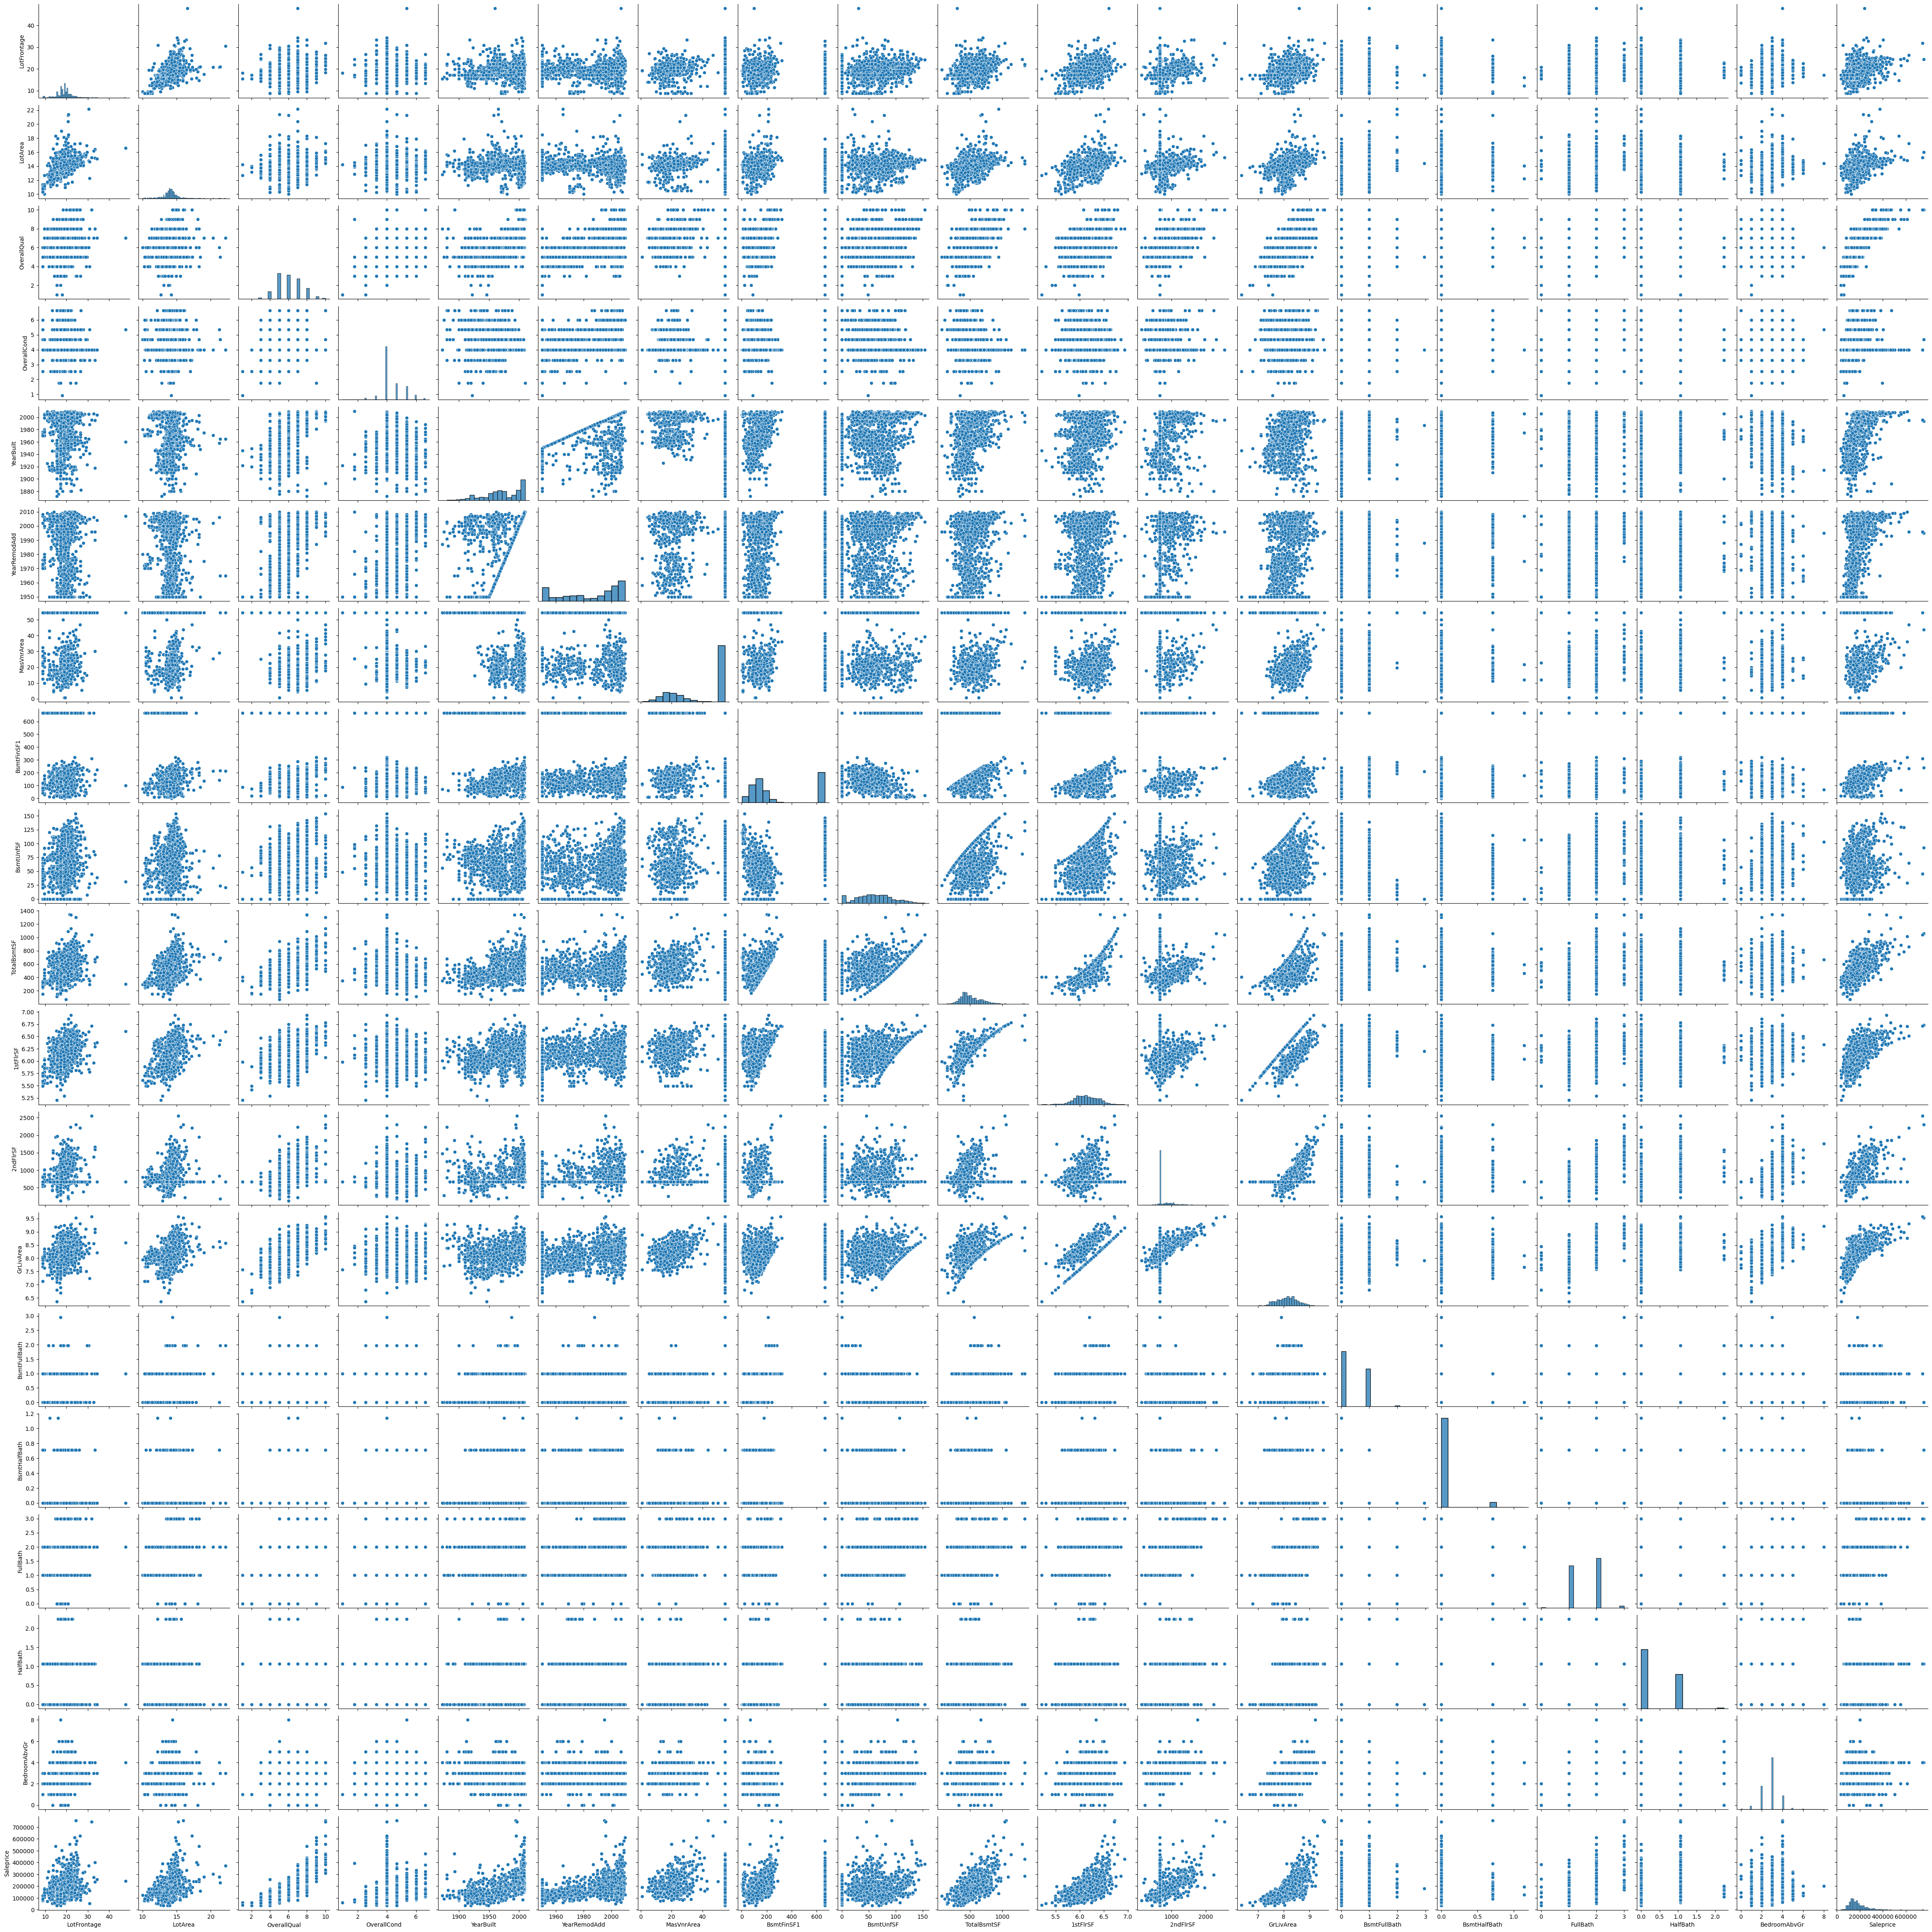

In [10]:
sns.pairplot(df_home)

In [11]:
df_features=df_home.columns[:-1].to_list()

### split data 

In [12]:
X = df_home[df_features].values
y = df_home['Saleprice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape)

(1166, 18)


In [14]:
print(X_test.shape)

(292, 18)


In [15]:
print(y_train.shape)

(1166,)


In [16]:
print(y_test.shape)

(292,)


In [17]:
y_train

array([145001., 178001., 148501., ..., 138501., 131501., 259001.])

### Normalization

In [18]:
scalar= MinMaxScaler()
scalar.fit(X_train)
X_train=scalar.transform(X_train)
X_test=scalar.transform(X_test)

In [19]:
X_test

array([[0.41114737, 0.34964482, 0.66666667, ..., 0.66666667, 0.47775704,
        0.375     ],
       [0.        , 0.04015695, 0.55555556, ..., 0.33333333, 0.47775704,
        0.25      ],
       [0.19939181, 0.32595575, 0.44444444, ..., 0.33333333, 0.        ,
        0.25      ],
       ...,
       [0.17497128, 0.16668349, 0.66666667, ..., 0.66666667, 0.        ,
        0.125     ],
       [0.21829445, 0.32848178, 0.33333333, ..., 0.33333333, 0.        ,
        0.5       ],
       [0.26342545, 0.30795317, 0.33333333, ..., 0.33333333, 0.        ,
        0.375     ]])

### Model Building

In [20]:
model=Sequential()
model.add(Dense(9, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit(X_train,y_train,epochs=4000)

Epoch 1/4000
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 41520750592.0000
Epoch 2/4000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36233515008.0000
Epoch 3/4000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39612145664.0000
Epoch 4/4000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39328677888.0000
Epoch 5/4000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37674233856.0000
Epoch 6/4000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38843219968.0000
Epoch 7/4000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42265583616.0000
Epoch 8/4000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39527809024.0000
Epoch 9/4000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39470551040.0000
Epoch 10/4000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38971719680.0000
Epoch 11/4000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35558461440.0000
Epoch 12/4000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36958556160.0000
Epoch 13/4000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34377273344.

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


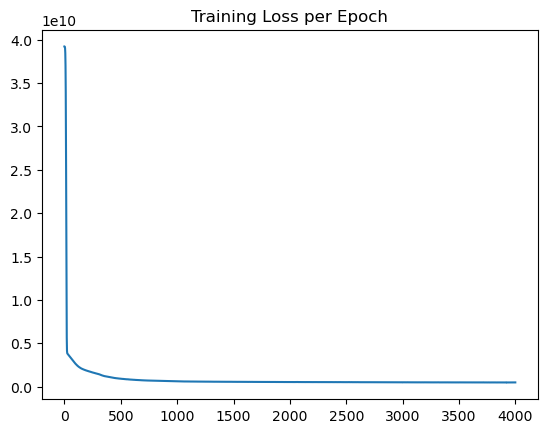

In [21]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [22]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [23]:
df_pred=pd.DataFrame({'test_actual': y_test})
df_pred['test_pred']=test_predictions
df_pred.head()

test_actual      test_pred
0     190001.0  217446.375000
1     100001.0  107487.289062
2     115001.0  108724.601562
3     159001.0  152515.906250
4     315501.0  325582.781250

<Axes: >

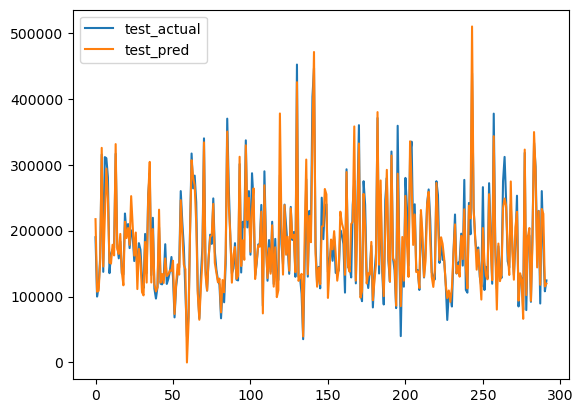

In [24]:
df_pred.plot(legend=True)

In [25]:
(df_pred['test_actual'].sum()-df_pred['test_pred'].sum())/df_pred['test_actual'].sum()

0.0098766295547524

In [26]:

r2 = r2_score(y_test, test_predictions)
print("R-squared Score (R2):", r2)

R-squared Score (R2): 0.9072992123377402
